In [1]:
##4grt11 Circuit
##All Imports Here

#Non-qiskit imports
import numpy as np
import matplotlib.pyplot as plt
import time

#Qiskit imports
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit,Aer
from qiskit.circuit.library import XGate, YGate, ZGate, HGate, CXGate, SwapGate, CCXGate, RZGate
from qiskit.compiler import transpile
from qiskit.providers.fake_provider import FakeValencia
#from qiskit.quantum_info import Operator
from qiskit.circuit.random import random_circuit


In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.circuit.library import C3XGate, C4XGate

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(1, 'c')
cal_qc = QuantumCircuit(qreg_q, creg_c)
backend = FakeValencia()
#backend = Aer.get_backend('qasm_simulator')

cal_qc.cx(qreg_q[4], qreg_q[1])
cal_qc.ccx(qreg_q[2], qreg_q[4], qreg_q[0])
cal_qc.x(qreg_q[0])
cal_qc.append(C3XGate(), [qreg_q[0], qreg_q[2], qreg_q[3], qreg_q[4]])
cal_qc.ccx(qreg_q[0], qreg_q[1], qreg_q[4])
cal_qc.append(C4XGate(), [qreg_q[1], qreg_q[0], qreg_q[2], qreg_q[3], qreg_q[4]])
# @columns [0,1,2,3,4,5]
cal_qc.draw(output='mpl')
# @columns [1,2,3,4,5]
# @columns [1,2,3,4,5]

layers = cal_qc.depth()

compiled_cal_qc = transpile(cal_qc, backend)

# Save the circuit to a QASM file
file_path = '4gt4-valencia.qasm'
with open(file_path, 'w') as file:
    file.write(compiled_cal_qc.qasm())

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

n_qbits = 5
data = 1

qreg_q = QuantumRegister(n_qbits, 'q')
creg_c = ClassicalRegister(data, 'c')

in_circuits = []

for i in range(16):
    in_qc = QuantumCircuit(qreg_q, creg_c)

    # Apply X gates based on the binary representation of 'i'
    binary_rep = format(i, '04b')
    for j in range(len(binary_rep)):
        if binary_rep[j] == '1':
            in_qc.x(qreg_q[j+1])

    in_qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])

    in_circuits.append(in_qc)

# Printing the circuit representations
for i, in_qc in enumerate(in_circuits):
    print(f"Circuit {i+1}:")
    print(in_qc)



Circuit 1:
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 
q_4: ─░─
      ░ 
c: 1/═══
        
Circuit 2:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
q_3: ──────░─
     ┌───┐ ░ 
q_4: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════
             
Circuit 3:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
     ┌───┐ ░ 
q_3: ┤ X ├─░─
     └───┘ ░ 
q_4: ──────░─
           ░ 
c: 1/════════
             
Circuit 4:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
     ┌───┐ ░ 
q_3: ┤ X ├─░─
     ├───┤ ░ 
q_4: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════
             
Circuit 5:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     └───┘ ░ 
q_3: ──────░─
           ░ 
q_4: ──────░─
           ░ 
c: 1/════════
             
Circuit 6:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     

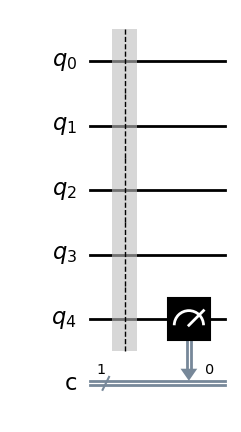

In [4]:
##Measurement/Output circuit = out_qc

out_qc = QuantumCircuit(qreg_q, creg_c)

out_qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
out_qc.measure(qreg_q[4], creg_c[0])

out_qc.draw(output='mpl')


In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler.passes import RemoveResetInZeroState, Unroller
from qiskit.transpiler import PassManager
from qiskit.circuit.library.standard_gates import IGate

# Create a new circuit to store the modified version
mod_qc = QuantumCircuit(cal_qc.num_qubits)

# Iterate through the original circuit and replace NOT gates with Identity gates
for instr, qargs, cargs in cal_qc:
    if instr.name == 'h':
        # If it's an X gate (NOT gate), replace with Identity gate
        mod_qc.append(IGate(), qargs)
    else:
        # If it's not an X gate, keep the original instruction
        mod_qc.append(instr, qargs, cargs)

print(mod_qc)


          ┌───┐┌───┐               
q_0: ─────┤ X ├┤ X ├──■────■────■──
     ┌───┐└─┬─┘└───┘  │    │    │  
q_1: ┤ X ├──┼─────────┼────■────■──
     └─┬─┘  │         │    │    │  
q_2: ──┼────■─────────■────┼────■──
       │    │         │    │    │  
q_3: ──┼────┼─────────■────┼────■──
       │    │       ┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ──■────■───────┤ X ├┤ X ├┤ X ├
                    └───┘└───┘└───┘


In [6]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

# Initialize an empty list to store the modified circuits
modified_circuits_before = []


# Iterate over each qubit
for qubit in qreg_q:
    # Create a new circuit for the modified version
    modified_qc_before = QuantumCircuit(qreg_q, creg_c)
    
   
    # Keep track of whether a NOT gate has been inserted before and after the current qubit
    not_before_inserted = False

    # Iterate over each gate in the original circuit
    for instruction, qargs, cargs in mod_qc:
        
        # Check if the gate involves the current qubit
        if qubit not in qargs:
            # Insert a NOT gate before the gate if not already inserted
            if not_before_inserted:
                modified_qc_before.append(instruction, qargs, cargs)  
            else:
                modified_qc_before.h(qubit)
                modified_qc_before.append(instruction, qargs, cargs)
                not_before_inserted = True                       
        else:
            not_before_inserted=False
            modified_qc_before.append(instruction, qargs, cargs)        
            
  
    modified_circuits_before.append(modified_qc_before)
            


# Initialize a list to store the modified circuits
new_circuits1 = []

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'h']
    
    # Iterate over the instructions in the circuit
    for i, (instruction, qargs, cargs) in enumerate(modified_qc_before):
        if instruction.name == 'h' and i in not_gate_indices:
            # If the NOT gate is present in cal_qc for this qubit, continue without creating a new circuit
            

            # Create a new circuit for each NOT gate
            new_qc = modified_qc_before.copy()
            # Add the corresponding NOT gate to the new circuit
            new_qc.h(qargs[0])

            # Add the remaining gates from the original circuit to the new circuit
            for j in reversed(range(len(new_qc))):
                if new_qc[j][0].name == 'h' and j != i:
                    new_qc.data.pop(j)

            new_depth_b = new_qc.depth()
            new_mod_qc = QuantumCircuit(cal_qc.num_qubits)

            # Add the modified circuits to the list
            if new_depth_b == layers:
                # Iterate through the original circuit and replace NOT gates with Identity gates
                for instr, qargs, cargs in new_qc:
                    if instr.name == 'id':
                        # If it's an X gate (NOT gate), replace with Identity gate
                        new_mod_qc.append(XGate(), qargs)
                    else:
                        # If it's not an X gate, keep the original instruction
                        new_mod_qc.append(instr, qargs, cargs)
                new_circuits1.append(new_mod_qc)

# Rest of the code remains the same


# Rest of the code remains the same

           

def remove_duplicates(circuit_list):
    # Initialize an empty set to store the unique circuits
    unique_circuits = set()
    
    # Initialize a new list to store the circuits without duplicates
    new_circuit_list = []
    
    # Iterate over each circuit in the original list
    for circuit in circuit_list:
        # Convert the circuit to a custom string representation
        circuit_str = str(circuit)
        
        # Check if the circuit string is already in the set
        if circuit_str not in unique_circuits:
            # If not, add it to the set and the new list
            unique_circuits.add(circuit_str)
            new_circuit_list.append(circuit)
    
    return new_circuit_list

# Your list of circuits (assuming it is already defined)
# circuit_list = [circuit1, circuit2, circuit3, ...]

# Call the remove_duplicates function to get the new list without duplicates
new_circuit_list = remove_duplicates(new_circuits1)        


# Display and save the modified circuits
#for i, modified_qc_before in enumerate(modified_circuits_before):
    #print(f"Modified Circuit (before) for qubit {i}:")
    #modified_qc_before.draw(output='mpl', filename=f"not_before_qubit_{i}.png")
    #print()

for i, new_qc in enumerate(new_circuit_list):
    print(f"Hadamard trojan for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"h_qubit_{i}.png")
    compiled_new_qc = transpile(new_qc,backend,optimization_level=1)

    file_path = f"Hadamard_4gt4_{i}.qasm"
    with open(file_path, 'w') as file:
        file.write(compiled_new_qc.qasm())
    print()






Hadamard trojan for qubit 0:

Hadamard trojan for qubit 1:

Hadamard trojan for qubit 2:

Hadamard trojan for qubit 3:

Hadamard trojan for qubit 4:

Hadamard trojan for qubit 5:

Hadamard trojan for qubit 6:

Hadamard trojan for qubit 7:



In [7]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

# Initialize an empty list to store the modified circuits
modified_circuits_before = []


# Iterate over each qubit
for qubit in qreg_q:
    # Create a new circuit for the modified version
    modified_qc_before = QuantumCircuit(qreg_q, creg_c)
    
   
    # Keep track of whether a NOT gate has been inserted before and after the current qubit
    not_before_inserted = False

    # Iterate over each gate in the original circuit
    for instruction, qargs, cargs in mod_qc:
        
        # Check if the gate involves the current qubit
        if qubit not in qargs:
            # Insert a NOT gate before the gate if not already inserted
            if not_before_inserted:
                modified_qc_before.append(instruction, qargs, cargs)  
            else:
                modified_qc_before.h(qubit)
                modified_qc_before.append(instruction, qargs, cargs)
                not_before_inserted = True                       
        else:
            not_before_inserted=False
            modified_qc_before.append(instruction, qargs, cargs)        
            
    #new_depth_b =  modified_qc_before.depth()
    # Add the modified circuits to the list
    #if new_depth_b == layers:
        modified_circuits_before.append(modified_qc_before)
            
# Define a helper function to check if a qubit already has a NOT gate in a circuit
def has_not_gate(circuit, qubit):
    for gate, qargs, _ in circuit.data:
        if gate.name == 'x' and qargs[0] == qubit:
            return True
    return False

# Initialize a list to store the modified circuits
new_circuits1 = []

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'x']
    
    # Iterate over the instructions in the circuit
    for i, (instruction, qargs, cargs) in enumerate(modified_qc_before):
        if instruction.name == 'h' and i in not_gate_indices:
            # If the NOT gate is present in cal_qc for this qubit, continue without creating a new circuit
            if has_not_gate(cal_qc, qargs[0]):
                continue

            # Create a new circuit for each NOT gate
            new_qc = modified_qc_before.copy()
            # Add the corresponding NOT gate to the new circuit
            new_qc.x(qargs[0])

            # Add the remaining gates from the original circuit to the new circuit
            for j in reversed(range(len(new_qc))):
                if new_qc[j][0].name == 'h' and j != i and not has_not_gate(cal_qc, new_qc[j][1][0]):
                    new_qc.data.pop(j)

            new_depth_b = new_qc.depth()
            # Add the modified circuits to the list
            if new_depth_b == layers:
                new_circuits1.append(new_qc)

# Rest of the code remains the same


# Rest of the code remains the same

           

def remove_duplicates(circuit_list):
    # Initialize an empty set to store the unique circuits
    unique_circuits = set()
    
    # Initialize a new list to store the circuits without duplicates
    new_circuit_list = []
    
    # Iterate over each circuit in the original list
    for circuit in circuit_list:
        # Convert the circuit to a custom string representation
        circuit_str = str(circuit)
        
        # Check if the circuit string is already in the set
        if circuit_str not in unique_circuits:
            # If not, add it to the set and the new list
            unique_circuits.add(circuit_str)
            new_circuit_list.append(circuit)
    
    return new_circuit_list

# Your list of circuits (assuming it is already defined)
# circuit_list = [circuit1, circuit2, circuit3, ...]

# Call the remove_duplicates function to get the new list without duplicates
new_circuit_list = remove_duplicates(new_circuits1)        


# Display and save the modified circuits
#for i, modified_qc_before in enumerate(modified_circuits_before):
    #print(f"Modified Circuit (before) for qubit {i}:")
    #modified_qc_before.draw(output='mpl', filename=f"not_before_qubit_{i}.png")
    #print()

for i, new_qc in enumerate(new_circuit_list):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"not_qubit_{i}.png")
    #depthfinal = new_qc.depth()
    #print(depthfinal)
    print()





Modified Circuit (before) for qubit 0:

Modified Circuit (before) for qubit 1:

Modified Circuit (before) for qubit 2:

Modified Circuit (before) for qubit 3:

Modified Circuit (before) for qubit 4:

Modified Circuit (before) for qubit 5:

Modified Circuit (before) for qubit 6:



Infected circuit 0
Input:0
{'0': 651, '1': 349}
{'0': 661, '1': 339}
Input:1
{'0': 531, '1': 469}
{'0': 629, '1': 371}
Input:2
{'0': 652, '1': 348}
{'0': 648, '1': 352}
Input:3
{'0': 532, '1': 468}
{'0': 630, '1': 370}
Input:4
{'0': 633, '1': 367}
{'0': 645, '1': 355}
Input:5
{'0': 526, '1': 474}
{'0': 424, '1': 576}
Input:6
{'0': 528, '1': 472}
{'0': 455, '1': 545}
Input:7
{'0': 504, '1': 496}
{'0': 436, '1': 564}
Input:8
{'0': 521, '1': 479}
{'0': 420, '1': 580}
Input:9
{'0': 396, '1': 604}
{'0': 381, '1': 619}
Input:10
{'0': 544, '1': 456}
{'0': 458, '1': 542}
Input:11
{'0': 403, '1': 597}
{'0': 408, '1': 592}
Input:12
{'0': 517, '1': 483}
{'0': 440, '1': 560}
Input:13
{'0': 416, '1': 584}
{'0': 423, '1': 577}
Input:14
{'0': 538, '1': 462}
{'0': 442, '1': 558}
Input:15
{'0': 503, '1': 497}
{'0': 399, '1': 601}
Infected circuit 1
Input:0
{'0': 521, '1': 479}
{'0': 645, '1': 355}
Input:1
{'0': 521, '1': 479}
{'0': 614, '1': 386}
Input:2
{'0': 522, '1': 478}
{'0': 653, '1': 347}
Input:

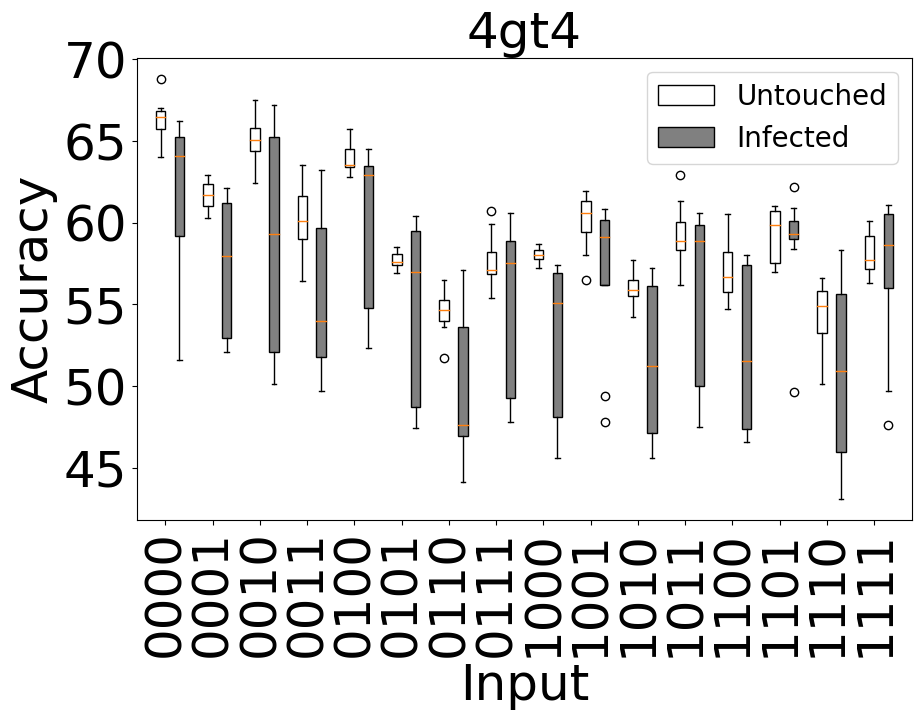

In [7]:
results_correct = {}  # Initialize an empty dictionary to store arrays
results_noisy = {}  # Initialize an empty dictionary to store arrays
# mean_degradation_array=[]
# max_degradation_array=[]
# min_degradation_array=[]

for i, in_qc in enumerate(in_circuits):        
        rn_name = f"result_n_{i}"  # Create a string with the desired array name
        results_noisy[rn_name] = []
        rc_name = f"result_c_{i}"  # Create a string with the desired array name
        results_correct[rc_name] = []
degradation_flip=[]
degradation_nonflip=[]
degradation=[]

for i, new_qc in enumerate(new_circuit_list):
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        rn_name = f"result_n_{i}"  # Create a string with the desired array name
        rc_name = f"result_c_{i}"  # Create a string with the desired array name
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = [i for i in range(1000, 1501, 100)]
        #for i in shots:
        #print(f"Shots: {i}:")    
        backend = FakeValencia()
        #backend = Aer.get_backend('qasm_simulator')

        qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc_noisy,shots=1000).result()
        
        # Extract the counts from the results
        count_noisy = results.get_counts(qc_noisy)

        #sort the counts

        count_noisy = dict(sorted(count_noisy.items()))
        print(count_noisy)
        #if i == 1000:
        cal_clean_qc = cal_qc.compose(out_qc, front=False, inplace=False)
        #cal_clean_qc.draw(output='mpl')
        org_c_qc = cal_clean_qc.compose(in_qc, front=True, inplace=False)
        #org_c_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = 1000    
        backend = FakeValencia()
        #backend = Aer.get_backend('qasm_simulator')

        qc = transpile(org_c_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc,shots=1000).result()
        
        # Extract the counts from the results
        count = results.get_counts(qc)

        #sort the counts

        count = dict(sorted(count.items()))
        
        print(count)
        try:
            if ((count_noisy['1']/1000 > 0.5) and (count['1']/1000 > 0.5)):
                diff = count['1']-count_noisy['1']
                degradation_nonflip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['1']/10)
                results_noisy[rn_name].append(count_noisy['1']/10)
        except KeyError:
            pass
        try:
            if ((count_noisy['0']/1000 > 0.5) and (count['0']/1000 > 0.5)):
                diff = count['0']-count_noisy['0']
                degradation_nonflip.append(diff/10)  
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0']/10)
                results_noisy[rn_name].append(count_noisy['0']/10)     
        except KeyError:
            pass
        try:
            if ((count_noisy['0']/1000 < 0.5) and (count['0']/1000 > 0.5)):
                diff = count['0']-count_noisy['0']
                degradation_flip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0']/10)
                results_noisy[rn_name].append(count_noisy['0']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['1']/1000 < 0.5) and (count['1']/1000 > 0.5)):
                diff = count['1']-count_noisy['1']
                degradation_flip.append(diff/10) 
                degradation.append(diff/10)
                results_correct[rc_name].append(count['1']/10)
                results_noisy[rn_name].append(count_noisy['1']/10)
        except KeyError:
            pass

       
# for i, in_qc in enumerate(in_circuits):
#     rn_name = f"result_n_{i}"  # Create a string with the desired array name
#     rc_name = f"result_c_{i}"  # Create a string with the desired array name
#     mean_difference=np.mean(results_correct[rc_name])-np.mean(results_noisy[rn_name])
#     mean_degradation_array.append(mean_difference)
#     max_difference=np.max(results_correct[rc_name])-np.min(results_noisy[rn_name])
#     max_degradation_array.append(max_difference)
#     min_difference=np.min(results_correct[rc_name])-np.max(results_noisy[rn_name])
#     min_degradation_array.append(min_difference)

        
avg_degradation_nf=np.mean(degradation_nonflip)   
max_degradation_nf=np.max(degradation_nonflip) 
min_degradation_nf=np.min(degradation_nonflip)    
print(avg_degradation_nf,max_degradation_nf, min_degradation_nf)
avg_degradation_f=np.mean(degradation_flip)   
max_degradation_f=np.max(degradation_flip) 
min_degradation_f=np.min(degradation_flip)    
print(avg_degradation_f,max_degradation_f, min_degradation_f)
avg_degradation=np.mean(degradation)
print(avg_degradation)





import matplotlib.pyplot as plt
import numpy as np

# Extract data from both dictionaries
data_to_plot_correct = list(results_correct.values())
data_to_plot_noisy = list(results_noisy.values())

# Determine the number of keys (assuming both dictionaries have the same keys)
num_keys = len(results_correct)

# Create positions for the side-by-side box plots
positions = np.arange(num_keys)

# Set up the figure
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Custom labels for x-axis (keys)
custom_labels = ['0000','0001', '0010', '0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111']  # Replace with your custom labels

# Create side-by-side box plots for each key
for i, (data_correct, data_noisy) in enumerate(zip(data_to_plot_correct, data_to_plot_noisy)):
    position_correct = positions[i]
    position_noisy = positions[i] + 0.4  # Offset for side-by-side arrangement

    box_plot_correct = plt.boxplot(data_correct, positions=[position_correct], widths=0.2, patch_artist=True)
    box_plot_noisy = plt.boxplot(data_noisy, positions=[position_noisy], widths=0.2, patch_artist=True)

    # Customize box colors
    box_plot_correct['boxes'][0].set_facecolor('white')
    box_plot_noisy['boxes'][0].set_facecolor('grey')

# Set x-axis ticks and labels
plt.xticks(positions + 0.1, custom_labels,fontsize=36,rotation=90)
plt.yticks(fontsize=36)
plt.xlabel('Input',fontsize=36)
plt.ylabel('Accuracy',fontsize=36)
plt.title('4gt4',fontsize=36)

# Add legend
plt.legend([box_plot_correct['boxes'][0], box_plot_noisy['boxes'][0]], ['Untouched', 'Infected'],loc='upper right', fontsize=20)

plt.show()


In [ ]:
from itertools import combinations
new_circuits2 = []         

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'x']

    # Iterate over the instructions in the circuit
    for combination in combinations(not_gate_indices, 2):
        new_qc = modified_qc_before.copy()                             
            
        # Add the remaining gates from the original circuit to the new circuit
        for j in reversed(range(len(new_qc))):
            if j not in combination and new_qc[j][0].name == 'x':
                new_qc.data.pop(j)
        
        # Add the modified circuit to the list
        new_circuits2.append(new_qc)


for i, new_qc in enumerate(new_circuits2):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"not_{i}.png")
    print()

In [ ]:
from qiskit import QuantumCircuit





# Generate circuits with an extra NOT gate from each circuit in modified_circuits_before
modified_cal_circuits = []
for modified_qc_before in modified_circuits_before:
    # Create a new circuit by combining modified_circuit with cal_qc
    modified_cal_circuit = cal_qc.copy()
    
    # Add the extra NOT gate from modified_circuit to modified_cal_circuit
    for instruction, qargs, cargs in modified_qc_before:
        if instruction.name == 'x':
            modified_cal_circuit.x(qargs[0])
    
    # Add the modified_cal_circuit to the list
    modified_cal_circuits.append(modified_cal_circuit)



for i, modified_cal_circuit in enumerate(modified_cal_circuits):
    print(f"Modified Circuit new for qubit {i}:")
    modified_cal_circuit.draw(output='mpl', filename=f"new_{i}.png")
    print()


Modified Circuit new for qubit 0:

Modified Circuit new for qubit 1:

Modified Circuit new for qubit 2:

Modified Circuit new for qubit 3:

Modified Circuit new for qubit 4:



In [ ]:

cal_out_qc = cal_qc.compose(out_qc, front=False, inplace=False)
cal_out_qc.draw(output='mpl')
## in_qc + cal_out_qc= org_qc
for i, in_qc in enumerate(in_circuits):
    print(f"Input:{i}")
    org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
    org_qc.draw(output='mpl')
    # Run the circuit and get results
    shots = 1000    
    backend = FakeValencia()
    qc = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
    results = backend.run(qc,shots=shots).result()
    
    # Extract the counts from the results
    count = results.get_counts(qc)

    #sort the counts

    count = dict(sorted(count.items()))

    print(count)
    print(count[1])

    #draw a histogram

    

Input:0
{'0000': 916, '0001': 84}


KeyError: 1

In [ ]:
for i, new_qc in enumerate(new_circuits1):
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        shots = [i for i in range(1000, 1501, 100)]
        for i in shots:
            print(f"Shots: {i}:")    
            backend = FakeValencia()
            qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
            results = backend.run(qc_noisy,shots=i).result()
            
            # Extract the counts from the results
            count_noisy = results.get_counts(qc_noisy)

            #sort the counts

            count_noisy = dict(sorted(count_noisy.items()))

            print(count_noisy)

            #draw a histogram

            

Infected circuit 0
Input:0
Shots: 1000:
{'0': 899, '1': 101}
Shots: 1100:
{'0': 991, '1': 109}
Shots: 1200:
{'0': 1074, '1': 126}
Shots: 1300:
{'0': 1174, '1': 126}
Shots: 1400:
{'0': 1236, '1': 164}
Shots: 1500:
{'0': 1336, '1': 164}
Input:1
Shots: 1000:
{'0': 897, '1': 103}
Shots: 1100:
{'0': 964, '1': 136}
Shots: 1200:
{'0': 1062, '1': 138}
Shots: 1300:
{'0': 1129, '1': 171}
Shots: 1400:
{'0': 1255, '1': 145}
Shots: 1500:
{'0': 1334, '1': 166}
Input:2
Shots: 1000:
{'0': 898, '1': 102}
Shots: 1100:
{'0': 958, '1': 142}
Shots: 1200:
{'0': 1066, '1': 134}
Shots: 1300:
{'0': 1172, '1': 128}
Shots: 1400:
{'0': 1230, '1': 170}
Shots: 1500:
{'0': 1328, '1': 172}
Input:3
Shots: 1000:
{'0': 876, '1': 124}
Shots: 1100:
{'0': 969, '1': 131}
Shots: 1200:
{'0': 1046, '1': 154}
Shots: 1300:
{'0': 1153, '1': 147}
Shots: 1400:
{'0': 1225, '1': 175}
Shots: 1500:
{'0': 1321, '1': 179}
Input:4
Shots: 1000:
{'0': 896, '1': 104}
Shots: 1100:
{'0': 970, '1': 130}
Shots: 1200:
{'0': 1082, '1': 118}
Shots:

Infected circuit 0
Input:0
{'0': 659, '1': 341}
{'0': 687, '1': 313}
diff=-28
Input:1
{'0': 423, '1': 577}
{'0': 603, '1': 397}
Input:2
{'0': 650, '1': 350}
{'0': 627, '1': 373}
diff=23
Input:3
{'0': 421, '1': 579}
{'0': 591, '1': 409}
Input:4
{'0': 628, '1': 372}
{'0': 639, '1': 361}
diff=-11
Input:5
{'0': 569, '1': 431}
{'0': 397, '1': 603}
Input:6
{'0': 612, '1': 388}
{'0': 446, '1': 554}
Input:7
{'0': 603, '1': 397}
{'0': 428, '1': 572}
Input:8
{'0': 647, '1': 353}
{'0': 418, '1': 582}
Input:9
{'0': 399, '1': 601}
{'0': 417, '1': 583}
diff=18
Input:10
{'0': 616, '1': 384}
{'0': 440, '1': 560}
Input:11
{'0': 404, '1': 596}
{'0': 417, '1': 583}
diff=13
Input:12
{'0': 617, '1': 383}
{'0': 472, '1': 528}
Input:13
{'0': 409, '1': 591}
{'0': 388, '1': 612}
diff=-21
Input:14
{'0': 633, '1': 367}
{'0': 442, '1': 558}
Input:15
{'0': 632, '1': 368}
{'0': 442, '1': 558}


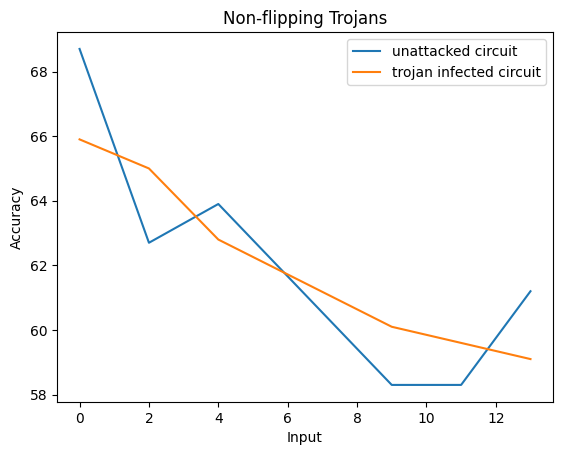

<Figure size 640x480 with 0 Axes>

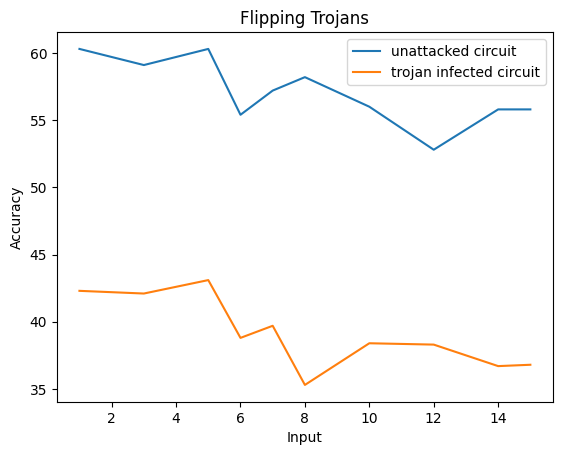

Infected circuit 1
Input:0
{'0': 422, '1': 578}
{'0': 653, '1': 347}
Input:1
{'0': 379, '1': 621}
{'0': 614, '1': 386}
Input:2
{'0': 446, '1': 554}
{'0': 635, '1': 365}
Input:3
{'0': 424, '1': 576}
{'0': 612, '1': 388}
Input:4
{'0': 436, '1': 564}
{'0': 653, '1': 347}
Input:5
{'0': 400, '1': 600}
{'0': 420, '1': 580}
diff=20
Input:6
{'0': 472, '1': 528}
{'0': 443, '1': 557}
diff=-29
Input:7
{'0': 414, '1': 586}
{'0': 443, '1': 557}
diff=29
Input:8
{'0': 659, '1': 341}
{'0': 441, '1': 559}
Input:9
{'0': 640, '1': 360}
{'0': 394, '1': 606}
Input:10
{'0': 634, '1': 366}
{'0': 450, '1': 550}
Input:11
{'0': 626, '1': 374}
{'0': 423, '1': 577}
Input:12
{'0': 636, '1': 364}
{'0': 426, '1': 574}
Input:13
{'0': 406, '1': 594}
{'0': 367, '1': 633}
diff=-39
Input:14
{'0': 444, '1': 556}
{'0': 466, '1': 534}
diff=22
Input:15
{'0': 460, '1': 540}
{'0': 399, '1': 601}
diff=-61


<Figure size 640x480 with 0 Axes>

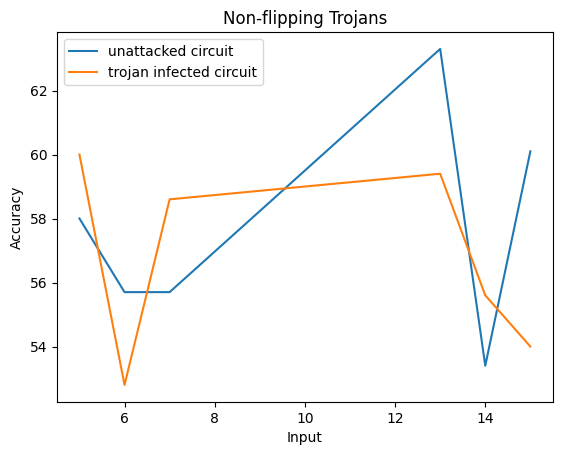

<Figure size 640x480 with 0 Axes>

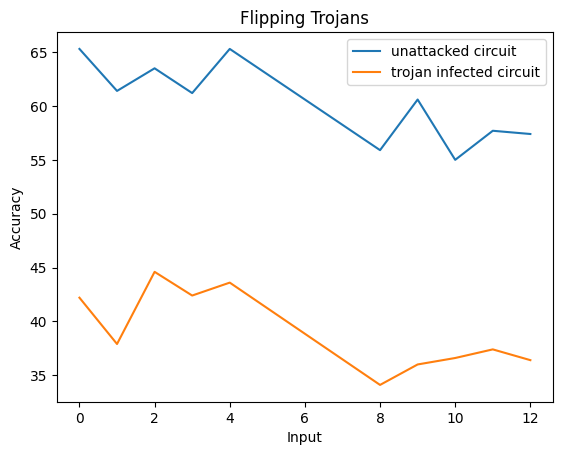

Infected circuit 2
Input:0
{'0': 625, '1': 375}
{'0': 644, '1': 356}
diff=-19
Input:1
{'0': 402, '1': 598}
{'0': 592, '1': 408}
Input:2
{'0': 442, '1': 558}
{'0': 638, '1': 362}
Input:3
{'0': 438, '1': 562}
{'0': 593, '1': 407}
Input:4
{'0': 649, '1': 351}
{'0': 619, '1': 381}
diff=30
Input:5
{'0': 613, '1': 387}
{'0': 434, '1': 566}
Input:6
{'0': 649, '1': 351}
{'0': 444, '1': 556}
Input:7
{'0': 628, '1': 372}
{'0': 429, '1': 571}
Input:8
{'0': 450, '1': 550}
{'0': 394, '1': 606}
diff=-56
Input:9
{'0': 408, '1': 592}
{'0': 418, '1': 582}
diff=10
Input:10
{'0': 457, '1': 543}
{'0': 422, '1': 578}
diff=-35
Input:11
{'0': 443, '1': 557}
{'0': 407, '1': 593}
diff=-36
Input:12
{'0': 412, '1': 588}
{'0': 411, '1': 589}
diff=-1
Input:13
{'0': 385, '1': 615}
{'0': 421, '1': 579}
diff=36
Input:14
{'0': 428, '1': 572}
{'0': 466, '1': 534}
diff=38
Input:15
{'0': 403, '1': 597}
{'0': 385, '1': 615}
diff=-18


<Figure size 640x480 with 0 Axes>

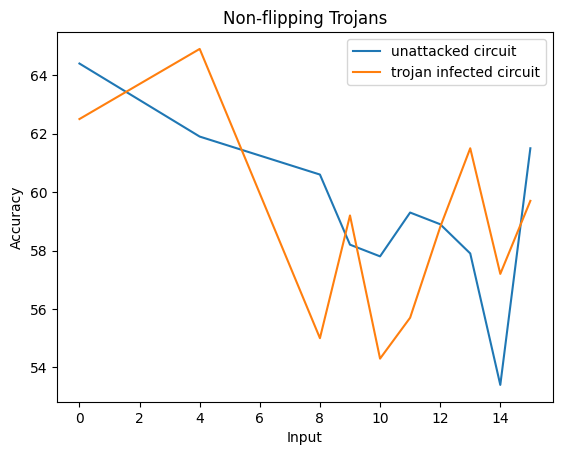

<Figure size 640x480 with 0 Axes>

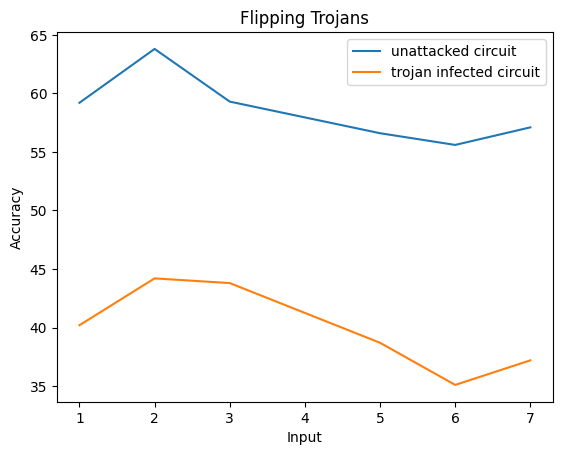

Infected circuit 3
Input:0
{'0': 633, '1': 367}
{'0': 651, '1': 349}
diff=-18
Input:1
{'0': 568, '1': 432}
{'0': 616, '1': 384}
diff=-48
Input:2
{'0': 452, '1': 548}
{'0': 664, '1': 336}
Input:3
{'0': 611, '1': 389}
{'0': 620, '1': 380}
diff=-9
Input:4
{'0': 657, '1': 343}
{'0': 635, '1': 365}
diff=22
Input:5
{'0': 390, '1': 610}
{'0': 438, '1': 562}
diff=48
Input:6
{'0': 658, '1': 342}
{'0': 441, '1': 559}
Input:7
{'0': 432, '1': 568}
{'0': 449, '1': 551}
diff=17
Input:8
{'0': 476, '1': 524}
{'0': 413, '1': 587}
diff=-63
Input:9
{'0': 385, '1': 615}
{'0': 404, '1': 596}
diff=19
Input:10
{'0': 454, '1': 546}
{'0': 421, '1': 579}
diff=-33
Input:11
{'0': 600, '1': 400}
{'0': 413, '1': 587}
Input:12
{'0': 406, '1': 594}
{'0': 422, '1': 578}
diff=16
Input:13
{'0': 399, '1': 601}
{'0': 389, '1': 611}
diff=-10
Input:14
{'0': 436, '1': 564}
{'0': 475, '1': 525}
diff=39
Input:15
{'0': 410, '1': 590}
{'0': 410, '1': 590}
diff=0


<Figure size 640x480 with 0 Axes>

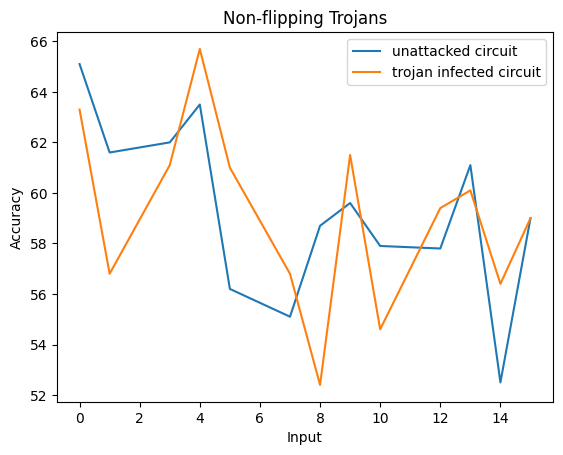

<Figure size 640x480 with 0 Axes>

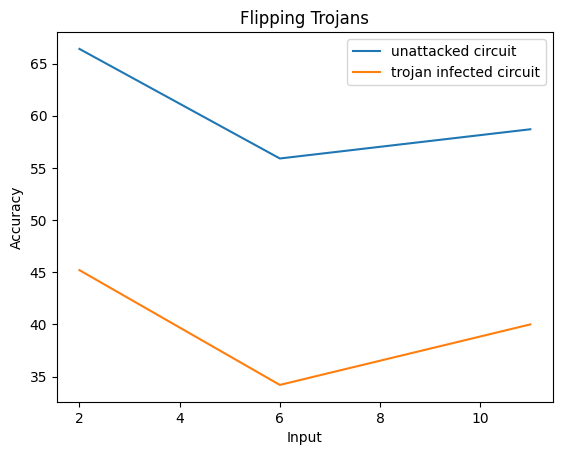

Infected circuit 4
Input:0
{'0': 658, '1': 342}
{'0': 645, '1': 355}
diff=13
Input:1
{'0': 606, '1': 394}
{'0': 631, '1': 369}
diff=-25
Input:2
{'0': 627, '1': 373}
{'0': 642, '1': 358}
diff=-15
Input:3
{'0': 455, '1': 545}
{'0': 614, '1': 386}
Input:4
{'0': 648, '1': 352}
{'0': 631, '1': 369}
diff=17
Input:5
{'0': 404, '1': 596}
{'0': 416, '1': 584}
diff=12
Input:6
{'0': 423, '1': 577}
{'0': 433, '1': 567}
diff=10
Input:7
{'0': 437, '1': 563}
{'0': 434, '1': 566}
diff=-3
Input:8
{'0': 431, '1': 569}
{'0': 419, '1': 581}
diff=-12
Input:9
{'0': 419, '1': 581}
{'0': 417, '1': 583}
diff=-2
Input:10
{'0': 579, '1': 421}
{'0': 438, '1': 562}
Input:11
{'0': 396, '1': 604}
{'0': 450, '1': 550}
diff=54
Input:12
{'0': 431, '1': 569}
{'0': 468, '1': 532}
diff=37
Input:13
{'0': 406, '1': 594}
{'0': 426, '1': 574}
diff=20
Input:14
{'0': 614, '1': 386}
{'0': 427, '1': 573}
Input:15
{'0': 408, '1': 592}
{'0': 425, '1': 575}
diff=17


<Figure size 640x480 with 0 Axes>

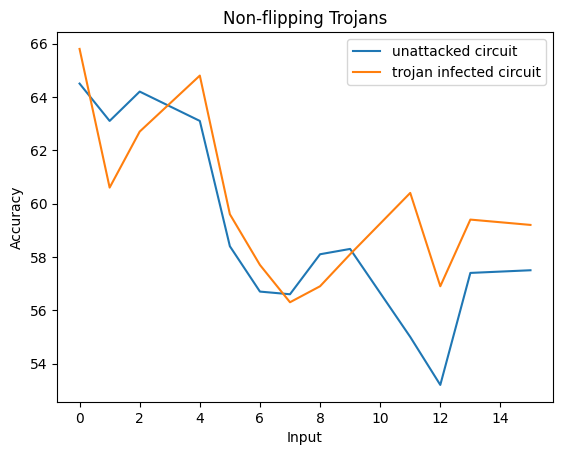

<Figure size 640x480 with 0 Axes>

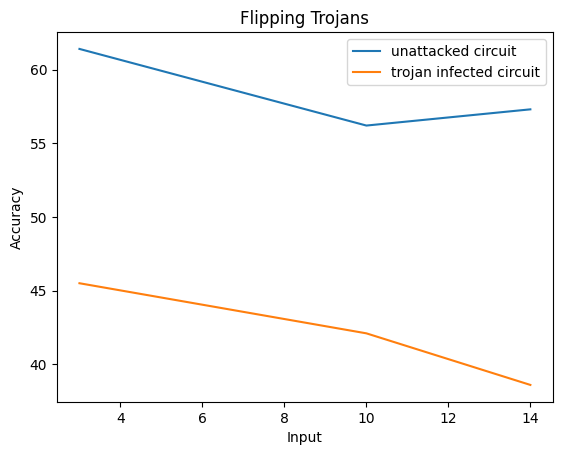

Infected circuit 5
Input:0
{'0': 639, '1': 361}
{'0': 669, '1': 331}
diff=-30
Input:1
{'0': 600, '1': 400}
{'0': 633, '1': 367}
diff=-33
Input:2
{'0': 653, '1': 347}
{'0': 674, '1': 326}
diff=-21
Input:3
{'0': 611, '1': 389}
{'0': 597, '1': 403}
diff=14
Input:4
{'0': 458, '1': 542}
{'0': 623, '1': 377}
Input:5
{'0': 418, '1': 582}
{'0': 424, '1': 576}
diff=6
Input:6
{'0': 670, '1': 330}
{'0': 434, '1': 566}
Input:7
{'0': 459, '1': 541}
{'0': 398, '1': 602}
diff=-61
Input:8
{'0': 446, '1': 554}
{'0': 441, '1': 559}
diff=-5
Input:9
{'0': 405, '1': 595}
{'0': 402, '1': 598}
diff=-3
Input:10
{'0': 462, '1': 538}
{'0': 415, '1': 585}
diff=-47
Input:11
{'0': 383, '1': 617}
{'0': 397, '1': 603}
diff=14
Input:12
{'0': 463, '1': 537}
{'0': 435, '1': 565}
diff=-28
Input:13
{'0': 390, '1': 610}
{'0': 398, '1': 602}
diff=8
Input:14
{'0': 437, '1': 563}
{'0': 464, '1': 536}
diff=27
Input:15
{'0': 409, '1': 591}
{'0': 445, '1': 555}
diff=36


<Figure size 640x480 with 0 Axes>

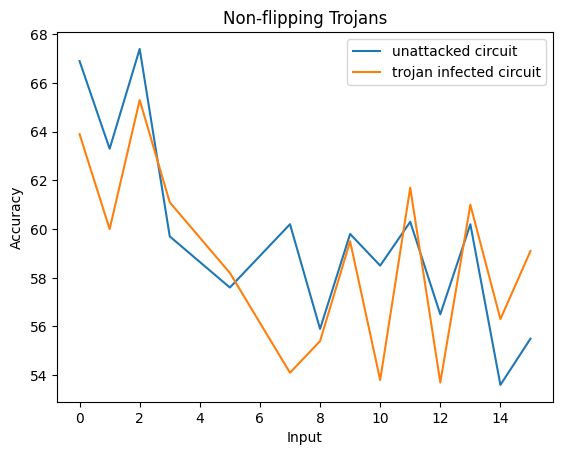

<Figure size 640x480 with 0 Axes>

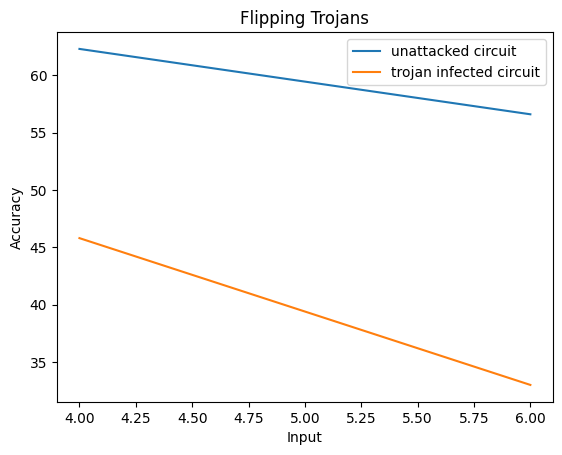

Infected circuit 6
Input:0
{'0': 661, '1': 339}
{'0': 654, '1': 346}
diff=7
Input:1
{'0': 614, '1': 386}
{'0': 633, '1': 367}
diff=-19
Input:2
{'0': 689, '1': 311}
{'0': 654, '1': 346}
diff=35
Input:3
{'0': 619, '1': 381}
{'0': 606, '1': 394}
diff=13
Input:4
{'0': 636, '1': 364}
{'0': 641, '1': 359}
diff=-5
Input:5
{'0': 411, '1': 589}
{'0': 380, '1': 620}
diff=-31
Input:6
{'0': 443, '1': 557}
{'0': 452, '1': 548}
diff=9
Input:7
{'0': 415, '1': 585}
{'0': 432, '1': 568}
diff=17
Input:8
{'0': 459, '1': 541}
{'0': 435, '1': 565}
diff=-24
Input:9
{'0': 391, '1': 609}
{'0': 394, '1': 606}
diff=3
Input:10
{'0': 458, '1': 542}
{'0': 462, '1': 538}
diff=4
Input:11
{'0': 392, '1': 608}
{'0': 424, '1': 576}
diff=32
Input:12
{'0': 601, '1': 399}
{'0': 429, '1': 571}
Input:13
{'0': 445, '1': 555}
{'0': 378, '1': 622}
diff=-67
Input:14
{'0': 633, '1': 367}
{'0': 465, '1': 535}
Input:15
{'0': 417, '1': 583}
{'0': 407, '1': 593}
diff=-10


<Figure size 640x480 with 0 Axes>

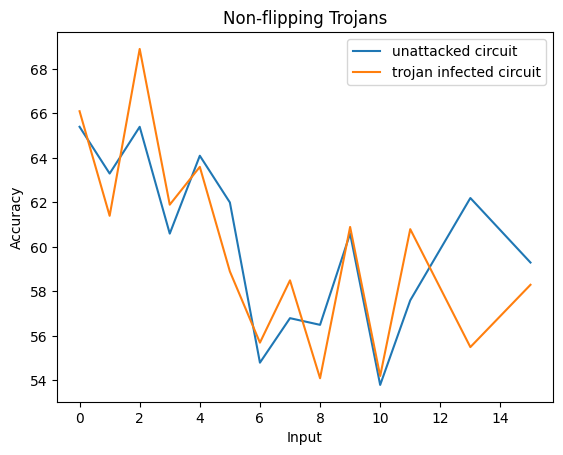

<Figure size 640x480 with 0 Axes>

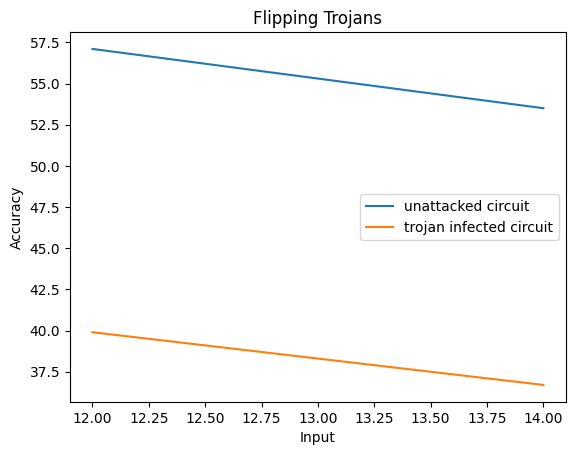

Infected circuit 7
Input:0
{'0': 385, '1': 615}
{'0': 656, '1': 344}
Input:1
{'0': 400, '1': 600}
{'0': 600, '1': 400}
Input:2
{'0': 394, '1': 606}
{'0': 609, '1': 391}
Input:3
{'0': 432, '1': 568}
{'0': 605, '1': 395}
Input:4
{'0': 409, '1': 591}
{'0': 651, '1': 349}
Input:5
{'0': 625, '1': 375}
{'0': 428, '1': 572}
Input:6
{'0': 589, '1': 411}
{'0': 481, '1': 519}
Input:7
{'0': 617, '1': 383}
{'0': 426, '1': 574}
Input:8
{'0': 626, '1': 374}
{'0': 418, '1': 582}
Input:9
{'0': 648, '1': 352}
{'0': 410, '1': 590}
Input:10
{'0': 622, '1': 378}
{'0': 426, '1': 574}
Input:11
{'0': 635, '1': 365}
{'0': 408, '1': 592}
Input:12
{'0': 651, '1': 349}
{'0': 415, '1': 585}
Input:13
{'0': 641, '1': 359}
{'0': 381, '1': 619}
Input:14
{'0': 581, '1': 419}
{'0': 429, '1': 571}
Input:15
{'0': 642, '1': 358}
{'0': 416, '1': 584}


<Figure size 640x480 with 0 Axes>

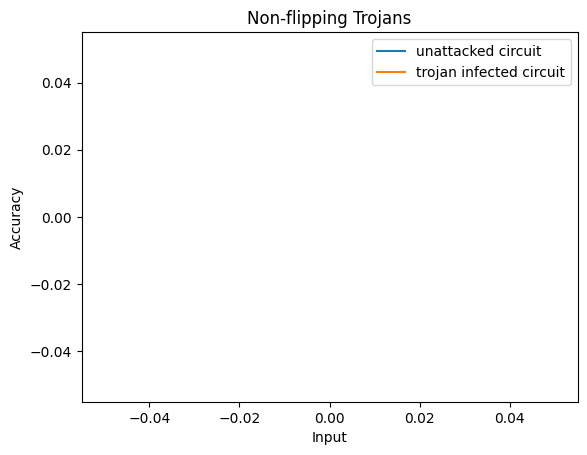

<Figure size 640x480 with 0 Axes>

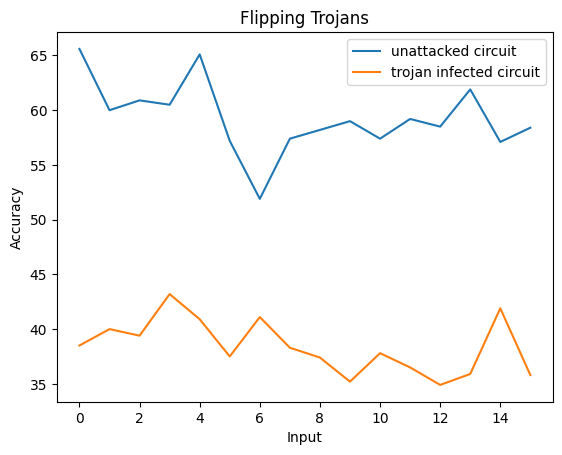

<Figure size 640x480 with 0 Axes>

In [8]:
for i, new_qc in enumerate(new_circuits1):
    results_noisy = [] 
    results_correct_flip =[]
    results_correct =[]
    results_noisy_flip =[]
    flip_circuits=[]
    non_flip_circuits=[]
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = [i for i in range(1000, 1501, 100)]
        #for i in shots:
        #print(f"Shots: {i}:")    
        backend = FakeValencia()
        qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc_noisy,shots=1000).result()
        
        # Extract the counts from the results
        count_noisy = results.get_counts(qc_noisy)

        #sort the counts

        count_noisy = dict(sorted(count_noisy.items()))
        


        print(count_noisy)
        #if i == 1000:
        cal_clean_qc = cal_qc.compose(out_qc, front=False, inplace=False)
        #cal_clean_qc.draw(output='mpl')
        org_c_qc = cal_clean_qc.compose(in_qc, front=True, inplace=False)
        #org_c_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = 1000    
        backend = FakeValencia()
        qc = transpile(org_c_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc,shots=1000).result()
        
        # Extract the counts from the results
        count = results.get_counts(qc)

        #sort the counts

        count = dict(sorted(count.items()))
        
        print(count)

        if (count['0']/1000 > 0.5):
            if (count_noisy['0']/1000 > 0.5):
                diff = count_noisy['0']-count['0']
                print(f"diff={diff}")
                results_correct.append(count['0']/10)
                results_noisy.append(count_noisy['0']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['0']/10)
                results_noisy_flip.append(count_noisy['0']/10)
                flip_circuits.append(i)

        if (count['1']/1000 > 0.5):
            if (count_noisy['1']/1000 > 0.5):
                diff = count_noisy['1']-count['1']
                print(f"diff={diff}") 
                results_correct.append(count['1']/10)
                results_noisy.append(count_noisy['1']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['1']/10)
                results_noisy_flip.append(count_noisy['1']/10)
                flip_circuits.append(i)

    import matplotlib.pyplot as plt
    import numpy as np

    # Assuming 'array1' and 'array2' are your arrays of data

    # Plot the data from both arrays
    plt.figure()  
    plt.plot(non_flip_circuits, results_correct, label='unattacked circuit')
    plt.plot(non_flip_circuits, results_noisy, label='trojan infected circuit')

    # Set labels and title
    plt.xlabel('Input')
    plt.ylabel('Accuracy')
    plt.title('Non-flipping Trojans')


    # Display legend
    plt.legend()

    # Show the plot
    plt.show()
    plt.clf()  # Clear the plot to create a new one

    plt.figure()  
    plt.plot(flip_circuits, results_correct_flip, label='unattacked circuit')
    plt.plot(flip_circuits, results_noisy_flip, label='trojan infected circuit')

    # Set labels and title
    plt.xlabel('Input')
    plt.ylabel('Accuracy')
    plt.title('Flipping Trojans')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()
    plt.clf()  # Clear the plot to create a new one

